In [66]:
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')

In [67]:
import matplotlib.pyplot as plt

import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import seaborn as sns
from plotly.offline  import download_plotlyjs,init_notebook_mode,plot, iplot
import cufflinks as cf
init_notebook_mode(connected = True)
cf.go_offline()
%matplotlib inline

### Change table style

In [68]:
%%html
<style>
table {float:left}
</style>

### Read the data

* The first dataset contains information about the fighters
* The second dataset contains information bout UFC events

In [69]:
basepath=("./datasets/")
pandas_list=[]

for item in os.listdir(basepath):
    print(item)
    fn=(os.path.join(basepath, item))                     #create a file handler 
    obj=pd.read_excel(fn,encoding="utf-8")                #open file as a pandas dataframe  
    pandas_list.append(obj)

UFC_Social.xlsx
UFC_PPV_Data.xlsx


In [70]:
fighter_stats=pandas_list[0]
event_stats=pandas_list[1]

In [71]:
pandas_list[0].head()

,Athlete,Category,Gender,Nation,Rank,Active,Twitter,Instagram,Facebook
0,Daniel Cormier,Heavyweight,M,USA,C,YES,709000,1900000,NaN
1,Stipe Miocic,Heavyweight,M,USA,1,YES,239000,774000,NaN
2,Francis Ngannou,Heavyweight,M,FRA,2,YES,99700,497000,NaN
3,Derrick Lewis,Heavyweight,M,USA,3,YES,148000,1500000,NaN
4,Curtis Blaydes,Heavyweight,M,USA,4,YES,12700,79100,NaN


### Dataset description


| Column        | Descriotion   |
| ------------- |:-------------:|
| Athlete       | Name of the athlete |
| Category      | Weight class  |
| Gender        | Male or Female|
| Nation        | Athlete's country|
| Rank          | Athlets rank within UFC category/weight class|
| Active        | Active or retired |
| Twitter       | Twitter followers|
| Instagram     | Instagram followers|
| Facebook      | Facebook followers|     

### Data analytics general flow

Each project focused on processing and analyzing data has these general steps:
* Understanding the data, data type, and various data formats.
* Data manipulation or data wrangling.
* Getting the insight.
* Providing a solution or an answer to a specific question

If you think about this,it all makes sense. If a subject or topic is clear its easier to provide answers/solution.  
So let's take some time to indroduce a couple of base statistics concepts.

### Data cleanup

Facebook appears to have a lot of NaN values. If the count is high its  a good idea to drop the column.

In [72]:
print(fighter_stats['Facebook'].isnull().count())
fighter_stats.drop(columns=['Facebook'], inplace=True)
fighter_stats.head()

171


,Athlete,Category,Gender,Nation,Rank,Active,Twitter,Instagram
0,Daniel Cormier,Heavyweight,M,USA,C,YES,709000,1900000
1,Stipe Miocic,Heavyweight,M,USA,1,YES,239000,774000
2,Francis Ngannou,Heavyweight,M,FRA,2,YES,99700,497000
3,Derrick Lewis,Heavyweight,M,USA,3,YES,148000,1500000
4,Curtis Blaydes,Heavyweight,M,USA,4,YES,12700,79100


In [73]:
print(fighter_stats['Twitter'].isnull().sum())
print(fighter_stats['Instagram'].isnull().sum())

2
1


In [74]:
cols=['Category','Gender','Nation']
stats=[]
for c in cols:
    print(c,"\n")
    print(fighter_stats[c].describe())
    
    ### Convert pandas series into a DataFrame ###
    data=pd.DataFrame(fighter_stats[c].describe()).reset_index()
    data.rename(columns={'index': 'Statistics'},inplace=True)
    stats.append(data)            

Category 

count              166
unique               9
top       Bantamweight
freq                26
Name: Category, dtype: object
Gender 

count     166
unique      2
top         M
freq      129
Name: Gender, dtype: object
Nation 

count     166
unique     24
top       USA
freq       83
Name: Nation, dtype: object


In [75]:
cat_values=fighter_stats['Category'].value_counts().values.tolist()
cat_index=fighter_stats['Category'].value_counts().index.tolist()

cc_values=fighter_stats['Nation'].value_counts().values.tolist()
cc_index=fighter_stats['Nation'].value_counts().index.tolist()
fighter_stats['Category'].value_counts()

Bantamweight         26
Flyweight            25
Featherweight        21
Heavyweight          20
Light Heavyweight    17
Middleweight         16
Welterweight         16
Lightweight          15
Strawweight          10
Name: Category, dtype: int64

In [101]:
fig = make_subplots(
        rows=1, cols=2,
        specs=[[{"type": "xy"}, {"type": "domain"}]],)

fig.add_trace(go.Bar(x=cc_index,y=cc_values, name="Fighters by Country",width=3),row=1, col=1)
fig.add_trace(go.Pie(labels=cat_index,values=cat_values,showlegend=True, title='Fighters by Category'),row=1, col=2)
fig.update_layout(height=500, width=1000,plot_bgcolor='white')

#fig.update_xaxes(showgrid=False, gridcolor="white", row=1, col=1)
#fig.update_yaxes(showgrid=False, gridcolor="white", row=1, col=1)

fig.show()

In [77]:
columns=['Twitter','Instagram']

for c in columns:
    fighter_stats[c]=pd.to_numeric(fighter_stats[c], errors='coerce')
    fighter_stats[c].fillna(value=0,inplace=True)

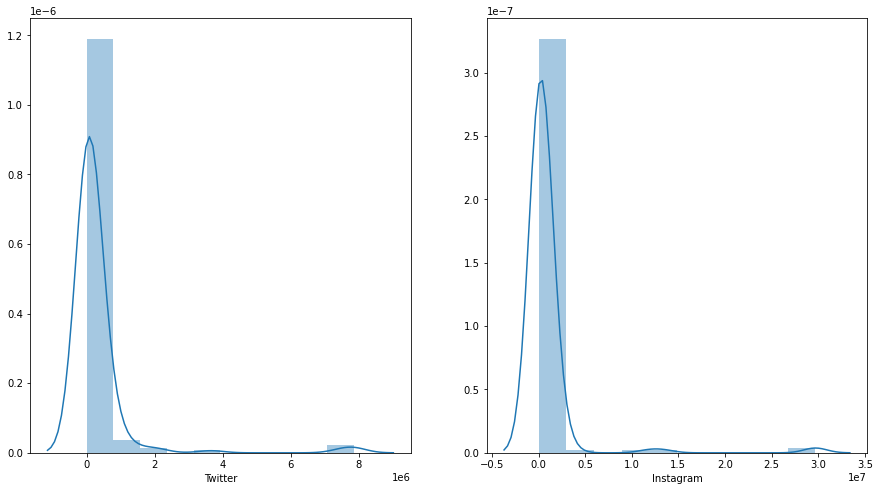

In [78]:
fig, ax = plt.subplots(1,2, figsize=(15, 8))
sns.distplot(fighter_stats['Twitter'], bins = 10, ax=ax[0]) #Blue 
sns.distplot(fighter_stats['Instagram'], bins = 10, ax=ax[1]) #Red

In [79]:
inst_values=fighter_stats['Instagram'].value_counts().values.tolist()
inst_index=fighter_stats['Instagram'].value_counts().index.tolist()

twt_values=fighter_stats['Twitter'].value_counts().values.tolist()
twt_index=fighter_stats['Twitter'].value_counts().index.tolist()
fighter_stats['Twitter'].value_counts()

0.0          12
17300.0       3
12700.0       2
12800.0       2
7860000.0     2
             ..
341000.0      1
5953.0        1
794000.0      1
3556.0        1
306000.0      1
Name: Twitter, Length: 154, dtype: int64

In [80]:
fig = make_subplots(rows=1, cols=2, start_cell="bottom-left")

fig.add_trace(go.Histogram(x=inst_values, y=inst_index,name='Instagram Distribution'),row=1, col=1)
fig.add_trace(go.Histogram(x=inst_values, y=inst_index,name='Twitter Distribution'),row=1, col=2)


fig.update_layout(height=600,width=1000)
fig.show()

Ref:
* https://plotly.com/python/subplots/

In [81]:
def plot_figure(data):
    import plotly.figure_factory as ff
    fig = ff.create_table(pd.DataFrame(data))
    fig.show()
for elem in stats:
    plot_figure(elem)
    print("\n\n")

In [82]:
print(fighter_stats['Category'].describe(),"\n")
fighter_stats['Category'].value_counts()

count              166
unique               9
top       Bantamweight
freq                26
Name: Category, dtype: object 



Bantamweight         26
Flyweight            25
Featherweight        21
Heavyweight          20
Light Heavyweight    17
Middleweight         16
Welterweight         16
Lightweight          15
Strawweight          10
Name: Category, dtype: int64

In [83]:
pandas_list[1].head()

,Event,Date,Venue,City,State/Province,Country,Attendance,EVENT #,PPV,Explanation,Month,Year,Extra Notes
0,UFC 1: The Beginning,1993-11-12,McNichols Sports Arena,Denver,Colorado,U.S.,7800,UFC 1,Not Available,Pre-PPV,November,1993,NaN
1,UFC 2: No Way Out,1994-03-11,Mammoth Gardens,Denver,Colorado,U.S.,2000,UFC 2,Not Available,Pre-PPV,March,1994,NaN
2,UFC 3: The American Dream,1994-09-09,Grady Cole Center,Charlotte,North Carolina,U.S.,NaN,UFC 3,Not Available,Pre-PPV,September,1994,NaN
3,UFC 4: Revenge of the Warriors,1994-12-16,Expo Square Pavilion,Tulsa,Oklahoma,U.S.,5857,UFC 4,Not Available,Pre-PPV,December,1994,NaN
4,UFC 5: The Return of the Beast,1995-04-07,Independence Arena,Charlotte,North Carolina,U.S.,6000,UFC 5,Not Available,Pre-PPV,April,1995,NaN


In [84]:
for c in cols:
    print(c,"\n")
    print(fighter_stats[c].value_counts(),"\n")

Category 

Bantamweight         26
Flyweight            25
Featherweight        21
Heavyweight          20
Light Heavyweight    17
Middleweight         16
Welterweight         16
Lightweight          15
Strawweight          10
Name: Category, dtype: int64 

Gender 

M    129
W     37
Name: Gender, dtype: int64 

Nation 

USA    83
BRA    37
RUS     8
AUS     4
POL     4
SWE     3
MEX     3
GBR     3
NZL     3
CAN     2
NED     2
UKR     2
FRA     1
CUB     1
CRO     1
IRL     1
BUL     1
SUI     1
ISL     1
PER     1
KYR     1
ARG     1
CHN     1
JPN     1
Name: Nation, dtype: int64 



### Cleanup social_stats dataset

**Twitter | Instagram** Columns are formated as strings. I will convert them into integrers and convert **`NaN`** values
into **0**.

Refs:
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html